<a href="https://colab.research.google.com/github/Prasanthsrinivas/studentscoreprediction/blob/main/studentscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Here we are going to predict stutent percentage using Linear regression Algorithm

In [2]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#reading the dataset
dataset=pd.read_csv("/content/student_scores.csv")
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.shape # checking no.of rows and columns

(25, 2)

In [5]:
dataset.describe() #describing dataset values to check outliers

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#checking for outliers using IQR method =>q3-q1
iqr=dataset.Hours.quantile(0.75)-dataset.Hours.quantile(0.25)
iqr
upperthreshold=dataset.Hours.quantile(0.75)+(1.5*iqr) #q3+1.5*iqr
lowerthreshlod=dataset.Hours.quantile(0.25)-(1.5*iqr) #q1-1.5*iqr
lowerthreshlod,upperthreshold
# here values are inbw the threshold values so no outliers detected

(-4.3500000000000005, 14.450000000000001)

In [11]:
dataset.isnull().sum()# no null values

Hours     0
Scores    0
dtype: int64

In [13]:
dataset=dataset.drop_duplicates() #removing duplicate values
dataset.shape

(25, 2)

In [17]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

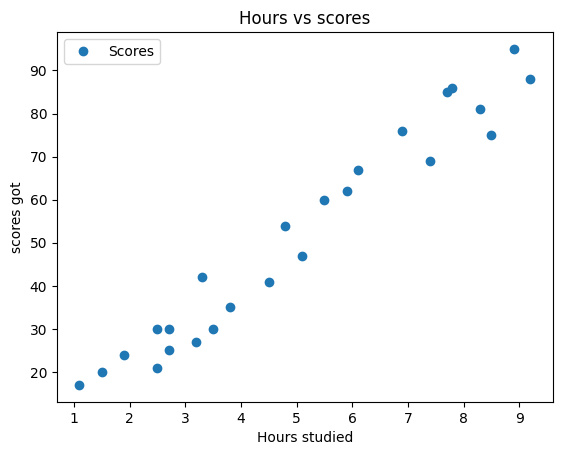

In [18]:
#EDA
dataset.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs scores")
plt.xlabel("Hours studied")
plt.ylabel("scores got")
plt.show()

here we can see a straight line relationship ie: linear relationship bw ft vs target

In [19]:
dataset.corr()# another to check linear relationship is using correlation ,valuses ranges frm -1 to +1

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [40]:
#splitting
from sklearn.model_selection import train_test_split
X=dataset.loc[:,["Hours"]].values# select all rows and select all columns except the last column as my feature
Y=dataset.loc[:,"Scores"].values# target
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
X_train

array([[2.7],
       [2.5],
       [8.9],
       [8.5],
       [3.3],
       [7.4],
       [6.1],
       [9.2],
       [7.8],
       [4.8],
       [1.1],
       [3.5],
       [8.3],
       [5.1],
       [2.5],
       [7.7],
       [5.9],
       [3.8]])

In [22]:
X_train.shape, X_test.shape

((18, 1), (7, 1))

In [41]:
#model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)
Y_pred

array([56.00145802, 17.05123054, 33.60507722, 46.26390115, 28.73629878,
       20.94625329, 69.63403764])

In [42]:
Y_pred,Y_test

(array([56.00145802, 17.05123054, 33.60507722, 46.26390115, 28.73629878,
        20.94625329, 69.63403764]),
 array([60, 20, 27, 41, 30, 24, 76]))

In [43]:
df = pd.DataFrame({'actual': Y_test,'predicted': Y_pred })
df

,actual,predicted
0,60,56.001458
1,20,17.051231
2,27,33.605077
3,41,46.263901
4,30,28.736299
5,24,20.946253
6,76,69.634038


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['actual', 'predicted']]], **{})
chart

In [45]:
print(reg.intercept_) # c parameter value

2.4448952324294098


In [46]:
print(reg.coef_) # slope - m parameter value

[9.73755687]


Metrics -to check my model works correct or not
for regression R2 score will be metrics

In [49]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))

R2- SCORE: 0.943745533311054
